In [16]:
# Import required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Step 1: Set the folder path where CSV files are stored
folder_path = r"C:\Users\navya\Desktop\Interview Exercise\csv Dataset"

# Step 2: Get a list of all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]
print(f"CSV Files Found: {csv_files}")
print(f"Total CSV files in folder: {len(csv_files)}")

CSV Files Found: ['Test6828_23082300069 000895-01 03.csv', 'Test6828_23082300070 000895-01 03.csv', 'Test6828_23082300071 000895-01 03.csv', 'Test6828_23082300072 000895-01 03.csv', 'Test6828_23082300074 000895-01 03.csv', 'Test6828_23082300077 000895-01 03.csv', 'Test6828_23082300078 000895-01 03.csv', 'Test6828_23082300079 000895-01 03.csv', 'Test6828_23082300080 000895-01 03.csv', 'Test6828_23082300081 000895-01 03.csv', 'Test6828_23082300082 000895-01 03.csv', 'Test6828_23082300083 000895-01 03.csv', 'Test6828_23082300084 000895-01 03.csv', 'Test6828_23082300085 000895-01 03.csv', 'Test6828_23082300087 000895-01 03.csv', 'Test6828_23082300089 000895-01 03.csv', 'Test6828_23082300090 000895-01 03.csv', 'Test6828_23082300091 000895-01 03.csv', 'Test6829_23082200038 000895-01 03.csv', 'Test6829_23082200040 000895-01 03.csv', 'Test6829_23082300042 000895-01 03.csv', 'Test6829_23082300044 000895-01 03.csv', 'Test6829_23082300046 000895-01 03.csv', 'Test6829_23082300049 000895-01 03.csv'

In [18]:
# Step 3: Initialize an empty list to store DataFrames
df_list = []

# Step 4: Loop through each CSV file and read the data
for index, filename in enumerate(csv_files):
    file_path = os.path.join(folder_path, filename)
    
# Skip the first 52 rows for all files except the first (which skips 51)
    skip_rows = 51 if index == 0 else 52
    
# Read the CSV file
df = pd.read_csv(file_path, skiprows=skip_rows)
    
# Append the DataFrame to the list
df_list.append(df)
# Step 5: Merge all DataFrames into a single DataFrame
merged_df = pd.concat(df_list, ignore_index=True)
# Step 6: Save the merged DataFrame to a new CSV file
output_file = os.path.join(folder_path, "merged_output11.csv")  # Change the filename if needed
merged_df.to_csv(output_file, index=False)
print(f"Merged file saved as: {output_file}")

Merged file saved as: C:\Users\navya\Desktop\Interview Exercise\csv Dataset\merged_output11.csv


In [19]:
print("Total number of cells in merged DataFrame:", merged_df.size)

Total number of cells in merged DataFrame: 432592


In [20]:
#Data Analysis
# Step 1: Verify Column Names
print("\n Verifying Column Names:")
print(merged_df.columns.tolist())  # Check if the expected columns exist


 Verifying Column Names:
['Test', 'Cell', 'Rack', 'Shelf', 'Position', 'Cell ID', 'Step', 'Instruction Name', 'Cycle', 'Total Time (Seconds)', 'Load On Time (Seconds)', 'Step Time (Seconds)', 'Cycle Charge Time (Seconds)', 'Cycle Discharge Time (Seconds)', 'Real Time', 'Position Start Time', 'Voltage (mV)', 'Current (mA)', 'Charge Capacity (mAh)', 'Discharge Capacity (mAh)', 'Charge Energy (mWh)', 'Discharge Energy (mWh)', 'ReasonCode', '50% DoD (mV)', '50% DoD vs CRate (mV)', 'PeakPower 1 (W)', 'PeakPower 2 (W)', 'Open Circuit Voltage 1 (V)', 'Open Circuit Voltage 2 (V)', 'Coulombic Efficiency', 'Internal Resistance 1 (mOhm)', 'Internal Resistance 2 (mOhm)', 'Contact Resistance (mOhm)', 'Current Contact Voltage (mV)', 'DC Internal Resistance (mOhm)', 'AC Internal Resistance (mOhm)', 'Station Temperature (°C)', 'Unnamed: 37']


In [21]:
# Step 2: Trim Extra Spaces from Column Names (if any)
column_mapping = {col: col.strip() for col in merged_df.columns}  # Remove leading/trailing spaces
merged_df.rename(columns=column_mapping, inplace=True)

# Step 3: Check if Charge and Discharge Capacity Columns Exist
expected_columns = ['Charge Capacity (mAh)', 'Discharge Capacity (mAh)']
if not all(col in merged_df.columns for col in expected_columns):
    print("Error: Required columns are missing from the dataset. Please check the column names!")
    print(f"Available columns: {merged_df.columns.tolist()}")
    exit()
# Step 4: Convert Capacity Columns to Numeric (Ensure proper datatype)
print("\nChecking Data Types Before Conversion:")
print(merged_df[expected_columns].dtypes)
merged_df['Charge Capacity (mAh)'] = pd.to_numeric(merged_df['Charge Capacity (mAh)'], errors='coerce')
merged_df['Discharge Capacity (mAh)'] = pd.to_numeric(merged_df['Discharge Capacity (mAh)'], errors='coerce')

# Step 5: Check for Missing Values Before Cleaning
print("\nMissing Values Before Cleaning:")
print(merged_df[expected_columns].isnull().sum())


Checking Data Types Before Conversion:
Charge Capacity (mAh)       int64
Discharge Capacity (mAh)    int64
dtype: object

Missing Values Before Cleaning:
Charge Capacity (mAh)       0
Discharge Capacity (mAh)    0
dtype: int64


In [22]:
# Step 6: Drop Rows with Missing Values in Critical Columns
merged_df.dropna(subset=expected_columns, inplace=True)

# Step 7: Recalculate Battery Capacity (Charge - Discharge)
merged_df["Capacity"] = merged_df["Charge Capacity (mAh)"] - merged_df["Discharge Capacity (mAh)"]

# Step 8: Check for Remaining Missing or Incorrect Values
print("\nMissing Values After Cleaning:")
print(merged_df[['Charge Capacity (mAh)', 'Discharge Capacity (mAh)', 'Capacity']].isnull().sum())


Missing Values After Cleaning:
Charge Capacity (mAh)       0
Discharge Capacity (mAh)    0
Capacity                    0
dtype: int64


In [23]:
# Step 9: Identify the Top 10 Cells with Highest Charge Capacity
top_10_cells = merged_df.nlargest(10, 'Charge Capacity (mAh)')
print("\nTop 10 Cells Based on Charge Capacity:")
print(top_10_cells[['Cell', 'Charge Capacity (mAh)', 'Discharge Capacity (mAh)', 'Capacity']])


Top 10 Cells Based on Charge Capacity:
      Cell  Charge Capacity (mAh)  Discharge Capacity (mAh)  Capacity
2889    19                  25154                         0     25154
2890    19                  25154                         0     25154
2891    19                  25154                         0     25154
2892    19                  25154                         9     25145
2893    19                  25154                        11     25143
2894    19                  25154                        19     25135
2895    19                  25154                        28     25126
2896    19                  25154                        30     25124
2897    19                  25154                        38     25116
2898    19                  25154                        48     25106


In [24]:
# Step 10: Find the Cell with the Highest Capacity
max_capacity_index = merged_df['Capacity'].idxmax()
max_capacity_row = merged_df.loc[max_capacity_index]
print("\nCell with the Highest Capacity:")
print(max_capacity_row)


Cell with the Highest Capacity:
Test                                                  6829
Cell                                                    19
Rack                                                 R.D05
Shelf                                                   S2
Position                                                 1
Cell ID                           23082300068 000895-01 03
Step                                                     2
Instruction Name                                  V Charge
Cycle                                                    0
Total Time (Seconds)                             112820.59
Load On Time (Seconds)                            78475.65
Step Time (Seconds)                                 518.77
Cycle Charge Time (Seconds)                              0
Cycle Discharge Time (Seconds)                           0
Real Time                              08/26/2023 08:13:06
Position Start Time                    08/25/2023 00:52:45
Voltage (mV)           

In [25]:
# Step 11: Save the Cleaned and Processed Dataset
cleaned_file_path = os.path.join(r"C:\Users\navya\Desktop\Interview Exercise\csv Dataset", "cleaned_merged_data.csv")
merged_df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved at: {cleaned_file_path}")


Cleaned dataset saved at: C:\Users\navya\Desktop\Interview Exercise\csv Dataset\cleaned_merged_data.csv


In [26]:
#Verification
print(merged_df.columns.tolist())  

['Test', 'Cell', 'Rack', 'Shelf', 'Position', 'Cell ID', 'Step', 'Instruction Name', 'Cycle', 'Total Time (Seconds)', 'Load On Time (Seconds)', 'Step Time (Seconds)', 'Cycle Charge Time (Seconds)', 'Cycle Discharge Time (Seconds)', 'Real Time', 'Position Start Time', 'Voltage (mV)', 'Current (mA)', 'Charge Capacity (mAh)', 'Discharge Capacity (mAh)', 'Charge Energy (mWh)', 'Discharge Energy (mWh)', 'ReasonCode', '50% DoD (mV)', '50% DoD vs CRate (mV)', 'PeakPower 1 (W)', 'PeakPower 2 (W)', 'Open Circuit Voltage 1 (V)', 'Open Circuit Voltage 2 (V)', 'Coulombic Efficiency', 'Internal Resistance 1 (mOhm)', 'Internal Resistance 2 (mOhm)', 'Contact Resistance (mOhm)', 'Current Contact Voltage (mV)', 'DC Internal Resistance (mOhm)', 'AC Internal Resistance (mOhm)', 'Station Temperature (°C)', 'Unnamed: 37', 'Capacity']


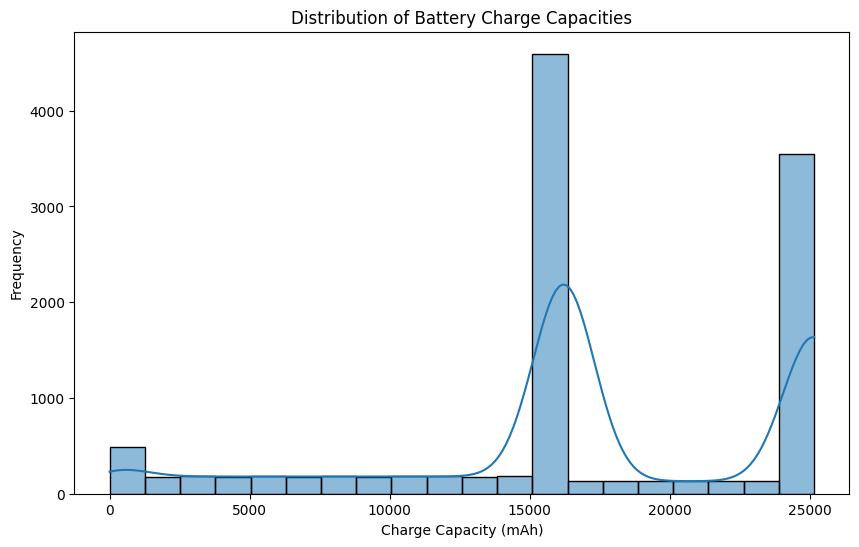

In [27]:
#Data Visualization
# Histogram of Charge Capacities (Charge - Discharge)
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Charge Capacity (mAh)'], bins=20, kde=True)
plt.xlabel('Charge Capacity (mAh)')
plt.ylabel('Frequency')
plt.title('Distribution of Battery Charge Capacities')
plt.show()

## Check for missing values before plotting
missing_charge_values = merged_df['Charge Capacity (mAh)'].isnull().sum()
if missing_charge_values > 0:
    print(f"Warning: {missing_charge_values} missing values detected in Charge Capacity. Cleaning data for plotting.")
    df_cleaned = merged_df.dropna(subset=['Charge Capacity (mAh)'])
else:
    df_cleaned = merged_df

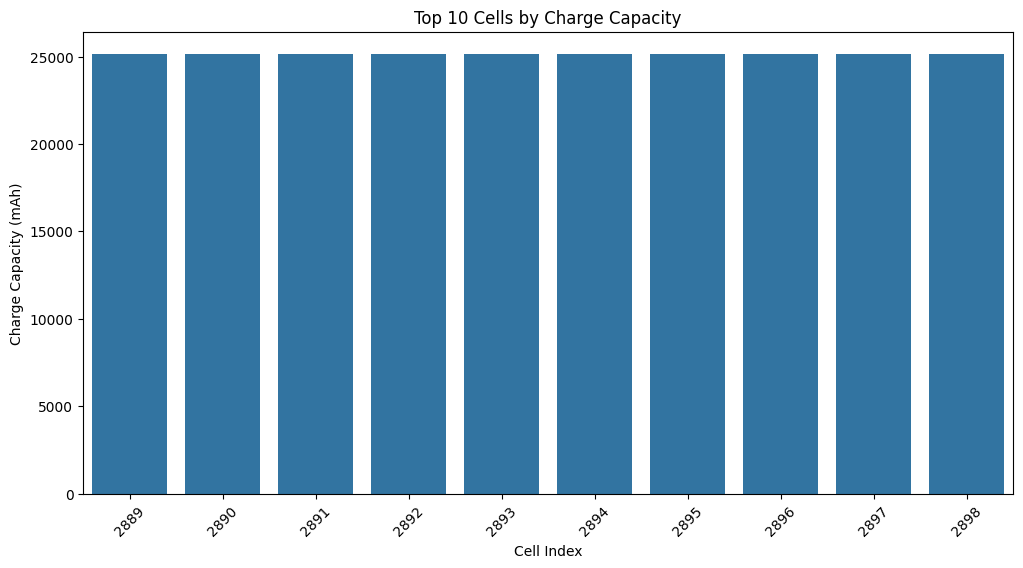

In [28]:
# Step 17: Bar Plot - Top 10 Cells by Charge Capacity
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_cells.index, y=top_10_cells['Charge Capacity (mAh)'])
plt.xlabel('Cell Index')
plt.ylabel('Charge Capacity (mAh)')
plt.title('Top 10 Cells by Charge Capacity')
plt.xticks(rotation=45)
plt.show()